# Example 12

In [1]:
from CircuitCalculator.SimpleCircuit.Elements import Schematic, VoltageSource, Impedance, Line, Ground
from CircuitCalculator.SimpleCircuit.DiagramParser import SchematicDiagramAnalyzer, SchematicDiagramSolution, network_parser
from CircuitCalculator.NodalAnalysis import nodal_analysis_solver
from CircuitCalculator.SimpleAnalysis.PointerDiagram import VoltagePointerDiagram, CurrentPointerDiagram

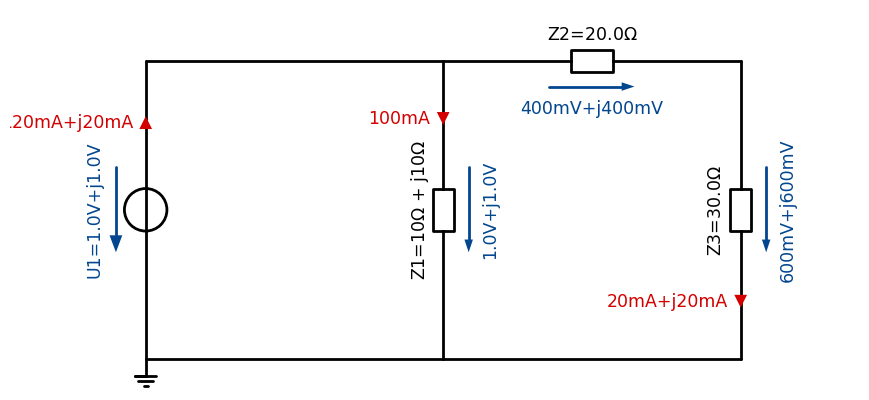

In [2]:
if __name__ == '__main__':
    with Schematic() as schematic:
        schematic += (U1:=VoltageSource(V=1+1j, name='U1', precision=2).up())
        schematic += Line().right()
        schematic += (Z1:=Impedance(Z=10+10j, name='Z1', precision=2).down())
        schematic += Line().left()
        schematic += Ground()
        schematic += Impedance(Z=20, name='Z2').at(Z1.start).right()
        schematic += Impedance(Z=30, name='Z3').down()
        schematic += Line().left()
        solution = nodal_analysis_solver(network_parser(schematic))
        schemdraw_solution = SchematicDiagramSolution(SchematicDiagramAnalyzer(schematic), solution)
        schematic += schemdraw_solution.draw_voltage('Z1', precision=2)
        schematic += schemdraw_solution.draw_current('Z1', precision=2)
        schematic += schemdraw_solution.draw_voltage('Z2', precision=2)
        schematic += schemdraw_solution.draw_voltage('Z3', precision=2)
        schematic += schemdraw_solution.draw_current('Z3', precision=2, end=True)
        schematic += schemdraw_solution.draw_current('U1', precision=2)

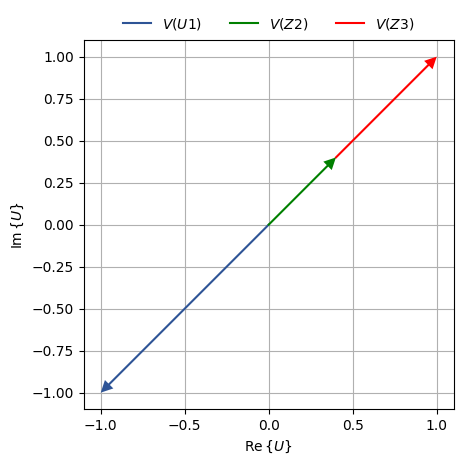

In [3]:
with VoltagePointerDiagram(solution, arrow_base=0.05) as pd:
    pd.add_voltage_pointer('U1')
    pd.add_voltage_pointer('Z2', color='green')
    pd.add_voltage_pointer('Z3', color='red', origin='Z2')

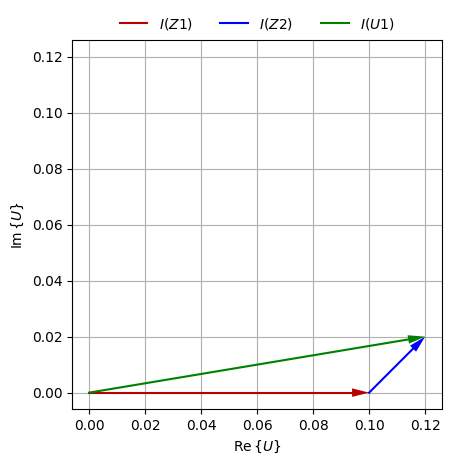

In [4]:
with CurrentPointerDiagram(solution, arrow_base=0.025) as pd:
    pd.add_current_pointer('Z1')
    pd.add_current_pointer('Z2', color='blue', origin='Z1')
    pd.add_current_pointer('U1', color='green')